# PhishEye

In [1]:
pip install dnstwist

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install DNSPython

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd

In [4]:
import dnstwist
fuzz = dnstwist.Fuzzer("www.google.com")
fuzz.generate()
len(fuzz.permutations())

2158

In [5]:
data = dnstwist.run(domain='google.com', registered=True, format='null')
reg = [d['domain'] for d in data]


In [6]:
data_non = dnstwist.run(domain='google.com', unregistered=True, format='null')
nonreg = [d['domain'] for d in data_non]


In [7]:
def intersection(lst1, lst2):
    return list(set(lst1) & set(lst2))

intersection(reg, nonreg)

[]

In [8]:
print (f'The number of registered permutations is: {len(reg)}')
print (f'The number of non registered permutations is: {len(nonreg)}')


The number of registered permutations is: 261
The number of non registered permutations is: 1895


In [9]:
print (reg[::15])
print (nonreg[::150])

['google.com', 'googlew.com', 'google3.com', 'coogle.com', 'googlg.com', 'xn--googe-7nc.com', 'xn--oole-z7bc.com', 'xn--oole-cxa78i.com', 'g0og1e.com', 'xn--googl-lsa.com', 'goog1e.com', 'g-oogle.com', 'googfle.com', 'goopgle.com', 'googl.com', 'toogle.com', 'gooyle.com', 'gaogle.com']
['g00qle.com', 'xn--ggl-c7aa23f.com', 'xn--gle-bgb47aa.com', 'xn--goge-i9b8074b.com', 'xn--gogl-opa8b.com', 'xn--gole-msb8245b.com', 'xn--gooie-y1a.com', 'xn--goqle-f91b.com', 'xn--ogle-ksb0345b.com', 'xn--ole-kob7wc.com', 'xn--oogl-eva18j.com', 'xn--ool-era05hca.com', 'xn--ooqle-71a.com']


In [10]:
import Levenshtein as lev
lev.distance(reg[0], nonreg[1])

2

In [11]:
reg[0]

'google.com'

In [12]:
nonreg[0]

'g00qle.com'

In [13]:
domains_df = pd.read_csv('./top-1m.csv', header=None, index_col=0)
domains_df.head()

,1
0,
1,google.com
2,facebook.com
3,a-msedge.net
4,youtube.com
5,amazonaws.com


In [14]:
def get_dicts(domain_list):
    reg_dict, nonreg_dict = {}, {}
    for domain in domain_list:
        data_reg = dnstwist.run(domain=f'{domain}', registered=True, format='null')
        reg = [d['domain'] for d in data_reg]
        reg_dict[domain]  = len(reg)
        data_nonreg = dnstwist.run(domain=f'{domain}', unregistered=True, format='null')
        nonreg = [d['domain'] for d in data_nonreg]
        nonreg_dict[domain]  = len(nonreg)
    return reg_dict, nonreg_dict
eda_reg, eda_nonreg = get_dicts(list(domains_df[1].values[:10]))
eda_reg


{'google.com': 262,
 'facebook.com': 252,
 'a-msedge.net': 12,
 'youtube.com': 243,
 'amazonaws.com': 171,
 'microsoft.com': 267,
 'twitter.com': 220,
 'akamaiedge.net': 52,
 'baidu.com': 153,
 'instagram.com': 275}

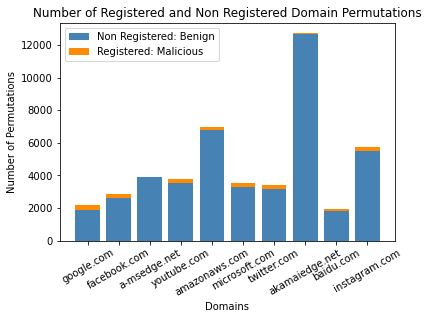

In [15]:

import numpy as np 
import matplotlib.pyplot as plt 
  
x = list(eda_reg.keys())
Yreg = list(eda_reg.values())
Znonreg= list(eda_nonreg.values())
X_axis = np.arange(len(x))
  
plt.bar(x, Znonreg, color='steelblue')
plt.bar(x, Yreg, bottom=Znonreg, color='darkorange')
  
plt.xlabel("Domains")
plt.ylabel("Number of Permutations")
plt.title("Number of Registered and Non Registered Domain Permutations")
plt.xticks(rotation=30)

plt.legend(labels = ['Non Registered: Benign', 'Registered: Malicious'])
plt.show()

In [24]:
def create_twist_dict(domains):
    twist_dict = {}
    for domain in domains:
        twist_dict[domain] = [[],[]]
        data_reg = dnstwist.run(domain=f'{domain}', registered=True, format='null')
        reg = [d['domain'] for d in data_reg]
        twist_dict[domain][1] = reg

        data_nonreg = dnstwist.run(domain=f'{domain}', unregistered=True, format='null')
        nonreg = [d['domain'] for d in data_nonreg]
        twist_dict[domain][0] = nonreg
    return twist_dict

twisted_dict = create_twist_dict(list(domains_df[1].values[:100]))

In [26]:
twisted_dict.keys()

dict_keys(['google.com', 'facebook.com', 'a-msedge.net', 'youtube.com', 'amazonaws.com', 'microsoft.com', 'twitter.com', 'akamaiedge.net', 'baidu.com', 'instagram.com', 'netflix.com', 'cloudflare.com', 'apple.com', 'linkedin.com', 'bilibili.com', 'wikipedia.org', 'qq.com', 'live.com', 'akamai.net', 'amazon.com', 'gtld-servers.net', 'azure.com', 'yahoo.com', 'googletagmanager.com', 'zhihu.com', 'l-msedge.net', 'bing.com', 'googlevideo.com', 'github.com', 'domaincontrol.com', 'reddit.com', 'pinterest.com', 'wordpress.org', 'whatsapp.com', 'office.com', 'doubleclick.net', 'youtu.be', 's-msedge.net', 'windowsupdate.com', 'fastly.net', 'zoom.us', 'microsoftonline.com', 'mail.ru', 'akadns.net', 'nflxso.net', 'yandex.ru', 'adobe.com', 'vimeo.com', 'googleusercontent.com', 'openai.com', 'trafficmanager.net', 'fdv2-t-msedge.net', 'gandi.net', 'wordpress.com', 'goo.gl', 'taobao.com', 'sharepoint.com', 'intuit.com', '163.com', 'bit.ly', 'vk.com', 'windows.net', 'apple-dns.net', 't.co', 'tiktok.co

In [47]:
twisted_df = pd.DataFrame.from_dict(twisted_dict, orient='index').reset_index()
twisted_df.columns = ['Domain', 'NonReg', 'Reg']
twisted_df


,Domain,NonReg,Reg
0,google.com,"[g00qle.com, g0oglc.com, go0glc.com, gooq1e.co...","[google.com, google7.com, googlea.com, googled..."
1,facebook.com,"[facebook7.com, faccb00k.com, faccb0ok.com, fa...","[facebook.com, facebook3.com, facebookk.com, f..."
2,a-msedge.net,"[a-msedge0.net, a-msedge1.net, a-msedge2.net, ...","[a-msedge.net, i-msedge.net, c-msedge.net, e-m..."
3,youtube.com,"[ymutube.com, xn--0utube-977b.com, xn--0utube-...","[youtube.com, youtube2.com, youtubea.com, yout..."
4,amazonaws.com,"[amazonaws0.com, amazonaws1.com, amazonaws3.co...","[amazonaws.com, amazonawso.com, amazonaws2.com..."
...,...,...,...
95,nic.ru,"[nic0.ru, nic2.ru, nic3.ru, nic4.ru, nic5.ru, ...","[nic.ru, nici.ru, nica.ru, nicw.ru, nicr.ru, n..."
96,nytimes.com,"[nytimes0.com, nytimes1.com, nytimes3.com, nyt...","[nytimes.com, nytimesw.com, nytimesu.com, nyti..."
97,dropbox.com,"[dropbox0.com, dropbox3.com, dropbox4.com, dro...","[dropbox.com, dropboxe.com, dropboxx.com, drop..."
98,google.com.hk,"[google0.com.hk, google1.com.hk, google2.com.h...","[google.com.hk, goggle.com.hk, googie.com.hk, ..."


In [48]:
twisted_df

,Domain,NonReg,Reg
0,google.com,"[g00qle.com, g0oglc.com, go0glc.com, gooq1e.co...","[google.com, google7.com, googlea.com, googled..."
1,facebook.com,"[facebook7.com, faccb00k.com, faccb0ok.com, fa...","[facebook.com, facebook3.com, facebookk.com, f..."
2,a-msedge.net,"[a-msedge0.net, a-msedge1.net, a-msedge2.net, ...","[a-msedge.net, i-msedge.net, c-msedge.net, e-m..."
3,youtube.com,"[ymutube.com, xn--0utube-977b.com, xn--0utube-...","[youtube.com, youtube2.com, youtubea.com, yout..."
4,amazonaws.com,"[amazonaws0.com, amazonaws1.com, amazonaws3.co...","[amazonaws.com, amazonawso.com, amazonaws2.com..."
...,...,...,...
95,nic.ru,"[nic0.ru, nic2.ru, nic3.ru, nic4.ru, nic5.ru, ...","[nic.ru, nici.ru, nica.ru, nicw.ru, nicr.ru, n..."
96,nytimes.com,"[nytimes0.com, nytimes1.com, nytimes3.com, nyt...","[nytimes.com, nytimesw.com, nytimesu.com, nyti..."
97,dropbox.com,"[dropbox0.com, dropbox3.com, dropbox4.com, dro...","[dropbox.com, dropboxe.com, dropboxx.com, drop..."
98,google.com.hk,"[google0.com.hk, google1.com.hk, google2.com.h...","[google.com.hk, goggle.com.hk, googie.com.hk, ..."


In [49]:
twisted_df.to_csv('twisted.csv')

In [51]:
# test = pd.read_csv('twisted.csv', index_col=0)
# test

,Domain,NonReg,Reg
0,google.com,"['g00qle.com', 'g0oglc.com', 'go0glc.com', 'go...","['google.com', 'google7.com', 'googlea.com', '..."
1,facebook.com,"['facebook7.com', 'faccb00k.com', 'faccb0ok.co...","['facebook.com', 'facebook3.com', 'facebookk.c..."
2,a-msedge.net,"['a-msedge0.net', 'a-msedge1.net', 'a-msedge2....","['a-msedge.net', 'i-msedge.net', 'c-msedge.net..."
3,youtube.com,"['ymutube.com', 'xn--0utube-977b.com', 'xn--0u...","['youtube.com', 'youtube2.com', 'youtubea.com'..."
4,amazonaws.com,"['amazonaws0.com', 'amazonaws1.com', 'amazonaw...","['amazonaws.com', 'amazonawso.com', 'amazonaws..."
...,...,...,...
95,nic.ru,"['nic0.ru', 'nic2.ru', 'nic3.ru', 'nic4.ru', '...","['nic.ru', 'nici.ru', 'nica.ru', 'nicw.ru', 'n..."
96,nytimes.com,"['nytimes0.com', 'nytimes1.com', 'nytimes3.com...","['nytimes.com', 'nytimesw.com', 'nytimesu.com'..."
97,dropbox.com,"['dropbox0.com', 'dropbox3.com', 'dropbox4.com...","['dropbox.com', 'dropboxe.com', 'dropboxx.com'..."
98,google.com.hk,"['google0.com.hk', 'google1.com.hk', 'google2....","['google.com.hk', 'goggle.com.hk', 'googie.com..."


In [52]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.


In [53]:
from PIL import Image, ImageDraw, ImageFont

In [67]:
img = Image.new('RGB', (256, 256))
text = "go0gle.com"
# use a truetype font
font = ImageFont.truetype("./fonts/arial.ttf", 15)
# Image is converted into editable form using
# Draw function and assigned to d1
d1 = ImageDraw.Draw(img)
# Center text in image
xpos = (img.size[0] / 2) - (font.getsize(text)[0]/2)
ypos = (img.size[1] / 2) - (font.getsize(text)[1]/2)
# Decide the text location, color and font
d1.text((xpos, ypos), text, fill =(255, 255, 255), font=font)
 
# show and save the image
img.show()
img.save("g0ogle.jpeg")


In [79]:
from skimage.metrics import structural_similarity as ssim, mean_squared_error as mse
import numpy as np
import cv2

def calculate_similarity(imageA, imageB):
    imageA = cv2.imread(imageA)
    imageB = cv2.imread(imageB)
    gsA = cv2.cvtColor(imageA, cv2.COLOR_BGR2GRAY)
    gsB = cv2.cvtColor(imageB, cv2.COLOR_BGR2GRAY)
    # Calculate the MSE and SSIM
    m = mse(gsA, gsB)
    s = ssim(gsA, gsB)

    return m, s

In [80]:
calculate_similarity('./google.jpeg', './g0ogle.jpeg')

(12.398849487304688, 0.998499693939025)